### Import the Modules and Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
import re
import string
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics
from joblib import dump, load
from nrclex import NRCLex
from wordcloud import WordCloud

### Import the Dataset

In [2]:
# load the dataset
election_dataset = pd.read_csv('my_test.csv')

C:\Users\USER\AppData\Local\Temp\ipykernel_33096\2524100386.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  election_dataset = pd.read_csv('my_test.csv')


In [3]:
# display the first few rows of the dataframe
election_dataset.head()

,Date,User,Tweet,User_Location
0,2023-01-23 20:24:20+00:00,Fabulous Faga,#OBI and #wife storm kastina state today.\n\nS...,"Abakaliki, Nigeria"
1,2023-01-23 22:20:47+00:00,Patriotic Nigerian,"If they can’t point to you one project , inves...","Lagos, Nigeria"
2,2023-01-23 18:05:02+00:00,KemKem,Governor @RotimiAkeredolu takes Asiwaju Bola A...,"Lagos, Nigeria"
3,2023-01-23 22:55:02+00:00,Iyorchia Ayu,Earlier today in Bayelsa for Atiku/Okowa Presi...,Nigeria
4,2023-01-23 21:35:37+00:00,Atikulated Agenda 2023,It is home coming for His Excellency Atiku Abu...,"Federal Capital Territory, Nig"


In [4]:
election_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131496 entries, 0 to 131495
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Date           131496 non-null  object
 1   User           101496 non-null  object
 2   Tweet          131496 non-null  object
 3   User_Location  131496 non-null  object
dtypes: object(4)
memory usage: 4.0+ MB


In [5]:
election_dataset.shape

(131496, 4)

### Preprocess the Tweet Data using NLTK

In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
# # Check for NaN values in the 'Tweet' column and drop them
# election_dataset = election_dataset.dropna(subset=['Tweet'])

# # Function for preprocessing text
# def preprocess_text(text):
#     if isinstance(text, str):
#         # Convert text to lowercase
#         text = text.lower()
#         # Remove punctuation and special characters
#         text = text.translate(str.maketrans('', '', string.punctuation))
#         # Remove URLs
#         text = re.sub(r"http\S+|www\S+|https\S+", "", text)
#         # Remove special characters and numbers
#         text = re.sub(r"[^\w\s]", "", text)
#         text = re.sub(r"\d+", "", text)
#         # Tokenize the text
#         tokens = word_tokenize(text)
#         # Remove stopwords
#         stop_words = set(stopwords.words('english'))
#         tokens = [token for token in tokens if token not in stop_words]
#         # Lemmatize tokens
#         lemmatizer = WordNetLemmatizer()
#         tokens = [lemmatizer.lemmatize(token) for token in tokens]
#         return " ".join(tokens)
#     else:
#         return ""

# # Apply preprocessing to the 'Tweet' column in the dataset
# election_dataset['Tweet'] = election_dataset['Tweet'].apply(preprocess_text)


In [7]:
election_dataset.head()

,Date,User,Tweet,User_Location
0,2023-01-23 20:24:20+00:00,Fabulous Faga,#OBI and #wife storm kastina state today.\n\nS...,"Abakaliki, Nigeria"
1,2023-01-23 22:20:47+00:00,Patriotic Nigerian,"If they can’t point to you one project , inves...","Lagos, Nigeria"
2,2023-01-23 18:05:02+00:00,KemKem,Governor @RotimiAkeredolu takes Asiwaju Bola A...,"Lagos, Nigeria"
3,2023-01-23 22:55:02+00:00,Iyorchia Ayu,Earlier today in Bayelsa for Atiku/Okowa Presi...,Nigeria
4,2023-01-23 21:35:37+00:00,Atikulated Agenda 2023,It is home coming for His Excellency Atiku Abu...,"Federal Capital Territory, Nig"


In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Remove URLs, special characters, and convert to lowercase
election_dataset['clean_text'] = election_dataset['Tweet'].apply(lambda x: re.sub(r"http\S+|[^a-zA-Z0-9]", " ", x).lower())

# Tokenize the text
election_dataset['tokenized_text'] = election_dataset['clean_text'].apply(lambda x: word_tokenize(x))

# Remove stopwords
stop_words = set(stopwords.words('english'))
election_dataset['filtered_text'] = election_dataset['tokenized_text'].apply(lambda x: [word for word in x if word not in stop_words])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
election_dataset.head()

,Date,User,Tweet,User_Location,clean_text,tokenized_text,filtered_text
0,2023-01-23 20:24:20+00:00,Fabulous Faga,#OBI and #wife storm kastina state today.\n\nS...,"Abakaliki, Nigeria",obi and wife storm kastina state today see...,"[obi, and, wife, storm, kastina, state, today,...","[obi, wife, storm, kastina, state, today, see,..."
1,2023-01-23 22:20:47+00:00,Patriotic Nigerian,"If they can’t point to you one project , inves...","Lagos, Nigeria",if they can t point to you one project inves...,"[if, they, can, t, point, to, you, one, projec...","[point, one, project, investment, vision, lega..."
2,2023-01-23 18:05:02+00:00,KemKem,Governor @RotimiAkeredolu takes Asiwaju Bola A...,"Lagos, Nigeria",governor rotimiakeredolu takes asiwaju bola a...,"[governor, rotimiakeredolu, takes, asiwaju, bo...","[governor, rotimiakeredolu, takes, asiwaju, bo..."
3,2023-01-23 22:55:02+00:00,Iyorchia Ayu,Earlier today in Bayelsa for Atiku/Okowa Presi...,Nigeria,earlier today in bayelsa for atiku okowa presi...,"[earlier, today, in, bayelsa, for, atiku, okow...","[earlier, today, bayelsa, atiku, okowa, presid..."
4,2023-01-23 21:35:37+00:00,Atikulated Agenda 2023,It is home coming for His Excellency Atiku Abu...,"Federal Capital Territory, Nig",it is home coming for his excellency atiku abu...,"[it, is, home, coming, for, his, excellency, a...","[home, coming, excellency, atiku, abubakar, n,..."


In [10]:
candidates = ['Atiku', 'Obi', 'Tinubu']

election_dataset['label'] = election_dataset['filtered_text'].apply(lambda x: 1 if any(candidate.lower() in x for candidate in candidates) else 0)


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(election_dataset['filtered_text'], election_dataset['label'], test_size=0.2, random_state=42)

In [12]:
election_dataset.head()

,Date,User,Tweet,User_Location,clean_text,tokenized_text,filtered_text,label
0,2023-01-23 20:24:20+00:00,Fabulous Faga,#OBI and #wife storm kastina state today.\n\nS...,"Abakaliki, Nigeria",obi and wife storm kastina state today see...,"[obi, and, wife, storm, kastina, state, today,...","[obi, wife, storm, kastina, state, today, see,...",1
1,2023-01-23 22:20:47+00:00,Patriotic Nigerian,"If they can’t point to you one project , inves...","Lagos, Nigeria",if they can t point to you one project inves...,"[if, they, can, t, point, to, you, one, projec...","[point, one, project, investment, vision, lega...",1
2,2023-01-23 18:05:02+00:00,KemKem,Governor @RotimiAkeredolu takes Asiwaju Bola A...,"Lagos, Nigeria",governor rotimiakeredolu takes asiwaju bola a...,"[governor, rotimiakeredolu, takes, asiwaju, bo...","[governor, rotimiakeredolu, takes, asiwaju, bo...",1
3,2023-01-23 22:55:02+00:00,Iyorchia Ayu,Earlier today in Bayelsa for Atiku/Okowa Presi...,Nigeria,earlier today in bayelsa for atiku okowa presi...,"[earlier, today, in, bayelsa, for, atiku, okow...","[earlier, today, bayelsa, atiku, okowa, presid...",1
4,2023-01-23 21:35:37+00:00,Atikulated Agenda 2023,It is home coming for His Excellency Atiku Abu...,"Federal Capital Territory, Nig",it is home coming for his excellency atiku abu...,"[it, is, home, coming, for, his, excellency, a...","[home, coming, excellency, atiku, abubakar, n,...",1


### Tweet Labelling with Vader Lexicon

In [13]:
from nltk.sentiment import SentimentIntensityAnalyzer
import numpy as np

# Calculate Sentiment Scores
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
election_dataset['Sentiment Score'] = election_dataset['Tweet'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Add Sentiment Column to the Dataset
election_dataset['Sentiment'] = pd.cut(election_dataset['Sentiment Score'], bins=[-np.inf, -0.2, 0.2, np.inf], labels=['Negative', 'Neutral', 'Positive'])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [14]:
# Count the number of tweets for each sentiment
sentiment_counts = election_dataset['Sentiment'].value_counts()
print(sentiment_counts)

Positive    54780
Neutral     53857
Negative    22859
Name: Sentiment, dtype: int64


In [15]:
election_dataset.head()

,Date,User,Tweet,User_Location,clean_text,tokenized_text,filtered_text,label,Sentiment Score,Sentiment
0,2023-01-23 20:24:20+00:00,Fabulous Faga,#OBI and #wife storm kastina state today.\n\nS...,"Abakaliki, Nigeria",obi and wife storm kastina state today see...,"[obi, and, wife, storm, kastina, state, today,...","[obi, wife, storm, kastina, state, today, see,...",1,0.6249,Positive
1,2023-01-23 22:20:47+00:00,Patriotic Nigerian,"If they can’t point to you one project , inves...","Lagos, Nigeria",if they can t point to you one project inves...,"[if, they, can, t, point, to, you, one, projec...","[point, one, project, investment, vision, lega...",1,0.2500,Positive
2,2023-01-23 18:05:02+00:00,KemKem,Governor @RotimiAkeredolu takes Asiwaju Bola A...,"Lagos, Nigeria",governor rotimiakeredolu takes asiwaju bola a...,"[governor, rotimiakeredolu, takes, asiwaju, bo...","[governor, rotimiakeredolu, takes, asiwaju, bo...",1,0.0000,Neutral
3,2023-01-23 22:55:02+00:00,Iyorchia Ayu,Earlier today in Bayelsa for Atiku/Okowa Presi...,Nigeria,earlier today in bayelsa for atiku okowa presi...,"[earlier, today, in, bayelsa, for, atiku, okow...","[earlier, today, bayelsa, atiku, okowa, presid...",1,0.3612,Positive
4,2023-01-23 21:35:37+00:00,Atikulated Agenda 2023,It is home coming for His Excellency Atiku Abu...,"Federal Capital Territory, Nig",it is home coming for his excellency atiku abu...,"[it, is, home, coming, for, his, excellency, a...","[home, coming, excellency, atiku, abubakar, n,...",1,0.5423,Positive


In [16]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Preprocessing function to clean the text
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    # Remove special characters and numbers
    text = re.sub(r"[^\w\s]", "", text)
    text = re.sub(r"\d+", "", text)
    # Convert to lowercase
    text = text.lower()
    return text

# Load and preprocess the dataset
election_dataset['Tweet'] = election_dataset['Tweet'].apply(preprocess_text)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(election_dataset['Tweet'], election_dataset['Sentiment'], test_size=0.2, random_state=42)

# Create and fit the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000)  # Increase max_features value if needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [ ]:
# When you want to preprocess and transform new input:
input_text = "Your input text here" 
preprocessed_input = preprocess_text(input_text)
input_features = tfidf_vectorizer.transform([preprocessed_input])

### Tweet Labelling with TextBlob

In [18]:
# from textblob import TextBlob

# # Function to get sentiment and sentiment scores using TextBlob
# def get_sentiment(text):
#     blob = TextBlob(text)
#     sentiment_score = blob.sentiment.polarity
#     if sentiment_score > 0:
#         sentiment = 'positive'
#     elif sentiment_score < 0:
#         sentiment = 'negative'
#     else:
#         sentiment = 'neutral'
#     return sentiment, sentiment_score

# # Apply sentiment analysis to the 'Tweet' column in the dataset
# election_dataset['Sentiment'], election_dataset['Sentiment_Score'] = zip(*election_dataset['Tweet'].map(get_sentiment))

### Analyze the overall sentiment and sentiment for each Presidential Candidate

In [19]:
# # Overall sentiment distribution
# overall_sentiment_counts = election_dataset['Sentiment'].value_counts()


# # Sentiment distribution for each presidential candidate
# candidate_sentiment_counts = election_dataset.groupby('User')['Sentiment'].value_counts()

# # Sentiment count for each presidential candidate (with handling KeyError)
# atiku_sentiment_counts = candidate_sentiment_counts.get(('Atiku',), 0)
# obi_sentiment_counts = candidate_sentiment_counts.get(('Obi',), 0)
# tinubu_sentiment_counts = candidate_sentiment_counts.get(('Tinubu',), 0)


### Training and Evaluating Machine Learning Models for Sentiment Classification

In [18]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(election_dataset['Tweet'], election_dataset['Sentiment'], test_size=0.2, random_state=42)

# Create and fit the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000)  # Increase max_features value if needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


### Import Sci-kit learn Modules for Text classification

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


Reducing model complexity can help in speeding up training and inference while still maintaining reasonable accuracy. One way to reduce model complexity is by using simpler models or models with fewer hyperparameters. Here's an example of how you can reduce model complexity for each of the ML models in your sentiment analysis pipeline

In [20]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(election_dataset['Tweet'], election_dataset['Sentiment'], test_size=0.2, random_state=42)

# Create and fit the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=3000)  # Increase max_features value if needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [22]:
import joblib
# Save the fitted vectorizer
joblib.dump(tfidf_vectorizer, 'updated_vectorizer.joblib')

['updated_vectorizer.joblib']

### Support Vector Machine

In [23]:
# Support Vector Machine
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)
svm_predictions = svm_model.predict(X_test_tfidf)
svm_accuracy = accuracy_score(y_test, svm_predictions)

### Naive Bayes

In [24]:
# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_predictions = nb_model.predict(X_test_tfidf)
nb_accuracy = accuracy_score(y_test, nb_predictions)

### Logistic Regression

In [25]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)
lr_predictions = lr_model.predict(X_test_tfidf)
lr_accuracy = accuracy_score(y_test, lr_predictions)

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Random Forest

In [26]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_tfidf, y_train)
rf_predictions = rf_model.predict(X_test_tfidf)
rf_accuracy = accuracy_score(y_test, rf_predictions)

In [27]:
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

(105196, 3000)
(26300, 3000)


In [28]:
# # Train and evaluate each model with cross-validation
# models = [svm_model, lr_model, rf_model]
# model_names = ['SVM', 'Naive Bayes', 'Logistic Regression', 'Random Forest']
# accuracy_scores = []

# for model, model_name in zip(models, model_names):
#     # Cross-validation
#     cv_scores = cross_val_score(model, X_train, y_train, cv=5)
#     mean_accuracy = cv_scores.mean()
#     accuracy_scores.append(mean_accuracy)
#     print(f"{model_name} Mean Cross-validation Accuracy: {mean_accuracy:.4f}")

In [29]:
# # Train and test the best model (highest cross-validation accuracy)
# best_model = models[accuracy_scores.index(max(accuracy_scores))]
# best_model.fit(X_train, y_train)
# y_pred = best_model.predict(X_test)

# # Evaluate the best model on the test set
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Best Model Test Accuracy: {accuracy:.4f}")

# # Classification report for the best model
# print("Classification Report:")
# print(classification_report(y_test, y_pred))

### Model Accuracy and Classification Report

In [28]:
print('Support Vector Machine Accuracy:', svm_accuracy)

Support Vector Machine Accuracy: 0.8694296577946768


In [29]:
print('Naive Bayes Accuracy:', nb_accuracy)

Naive Bayes Accuracy: 0.7468441064638783


In [30]:
print('Logistic Regression Accuracy:', lr_accuracy)

Logistic Regression Accuracy: 0.8508745247148289


In [31]:
print('Random Forest Accuracy:', rf_accuracy)

Random Forest Accuracy: 0.8318250950570342


In [32]:
print('Support Vector Machine Classification Report:\n', classification_report(y_test, svm_predictions))

Support Vector Machine Classification Report:
               precision    recall  f1-score   support

    Negative       0.82      0.72      0.76      4601
     Neutral       0.86      0.90      0.88     10672
    Positive       0.90      0.91      0.90     11027

    accuracy                           0.87     26300
   macro avg       0.86      0.84      0.85     26300
weighted avg       0.87      0.87      0.87     26300



In [33]:
print('Naive Bayes Classification Report:\n', classification_report(y_test, nb_predictions))


Naive Bayes Classification Report:
               precision    recall  f1-score   support

    Negative       0.78      0.51      0.61      4601
     Neutral       0.77      0.72      0.74     10672
    Positive       0.72      0.88      0.79     11027

    accuracy                           0.75     26300
   macro avg       0.76      0.70      0.72     26300
weighted avg       0.75      0.75      0.74     26300



In [34]:
print('Logistic Regression Classification Report:\n', classification_report(y_test, lr_predictions))


Logistic Regression Classification Report:
               precision    recall  f1-score   support

    Negative       0.80      0.67      0.73      4601
     Neutral       0.83      0.89      0.86     10672
    Positive       0.89      0.89      0.89     11027

    accuracy                           0.85     26300
   macro avg       0.84      0.82      0.83     26300
weighted avg       0.85      0.85      0.85     26300



In [35]:
election_dataset.head()

,Date,User,Tweet,User_Location,clean_text,tokenized_text,filtered_text,label,Sentiment Score,Sentiment
0,2023-01-23 20:24:20+00:00,Fabulous Faga,obi and wife storm kastina state today\n\nsee ...,"Abakaliki, Nigeria",obi and wife storm kastina state today see...,"[obi, and, wife, storm, kastina, state, today,...","[obi, wife, storm, kastina, state, today, see,...",1,0.6249,Positive
1,2023-01-23 22:20:47+00:00,Patriotic Nigerian,if they cant point to you one project investm...,"Lagos, Nigeria",if they can t point to you one project inves...,"[if, they, can, t, point, to, you, one, projec...","[point, one, project, investment, vision, lega...",1,0.2500,Positive
2,2023-01-23 18:05:02+00:00,KemKem,governor rotimiakeredolu takes asiwaju bola ah...,"Lagos, Nigeria",governor rotimiakeredolu takes asiwaju bola a...,"[governor, rotimiakeredolu, takes, asiwaju, bo...","[governor, rotimiakeredolu, takes, asiwaju, bo...",1,0.0000,Neutral
3,2023-01-23 22:55:02+00:00,Iyorchia Ayu,earlier today in bayelsa for atikuokowa presid...,Nigeria,earlier today in bayelsa for atiku okowa presi...,"[earlier, today, in, bayelsa, for, atiku, okow...","[earlier, today, bayelsa, atiku, okowa, presid...",1,0.3612,Positive
4,2023-01-23 21:35:37+00:00,Atikulated Agenda 2023,it is home coming for his excellency atiku abu...,"Federal Capital Territory, Nig",it is home coming for his excellency atiku abu...,"[it, is, home, coming, for, his, excellency, a...","[home, coming, excellency, atiku, abubakar, n,...",1,0.5423,Positive


### Inputting text to test the Model

In [36]:
print('Random Forest Classification Report:\n', classification_report(y_test, rf_predictions))

Random Forest Classification Report:
               precision    recall  f1-score   support

    Negative       0.89      0.57      0.70      4601
     Neutral       0.79      0.91      0.84     10672
    Positive       0.86      0.87      0.87     11027

    accuracy                           0.83     26300
   macro avg       0.85      0.78      0.80     26300
weighted avg       0.84      0.83      0.83     26300



In [45]:
# svm_model.fit(X_train_tfidf, y_train)
# svm_sentiment = svm_model.predict(input_features)[0]

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import SVC

# # Sample training data
# training_texts = election_dataset
# training_labels = [1, 0, 2]  # Example labels for positive, negative, neutral

# # Fit the TfidfVectorizer
# vectorizer = TfidfVectorizer()
# training_features = vectorizer.fit_transform(training_texts)

# # Train the SVM model
# svm_model = SVC()
# svm_model.fit(training_features, training_labels)

# # Now you can transform new input text and make predictions
# input_text = "New input text"
# preprocessed_input = preprocess_text(input_text)
# input_features = vectorizer.transform([preprocessed_input])

# svm_sentiment = svm_model.predict(input_features)[0]
# print(svm_sentiment)

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer(max_features=3000)

# Fit the vectorizer on the training data
vectorizer.fit(X_train)

TfidfVectorizer(max_features=3000)

In [42]:
input_text = input("Enter the text to classify its sentiment: ")

# Preprocess the input text
preprocessed_input = preprocess_text(input_text)

# Transform the preprocessed input text using the TfidfVectorizer
input_features = vectorizer.transform([preprocessed_input])

# Predict sentiment using each model
svm_sentiment = svm_model.predict(input_features)[0]

# Print the sentiment result
print("Sentiment Analysis Results \n:")
print("SVM Sentiment:", svm_sentiment)

Sentiment Analysis Results 
:
SVM Sentiment: Neutral


In [43]:
import pickle

# Save the model as a pickle file
with open('updated_svm_model.pkl', 'wb') as f:
    pickle.dump(svm_model, f)

In [57]:
# import h5py

# # Save the model as an h5 file
# with h5py.File('svm_model.h5', 'w') as f:
#     dset = f.create_dataset('svm_model', data=pickle.dumps(svm_model))

In [44]:
from joblib import dump

# Save the model using joblib
dump(svm_model, 'updated_svm_model.joblib')

['updated_svm_model.joblib']

In [59]:
vectorizer = TfidfVectorizer(max_features=3000)
model = SVC()

In [62]:
import joblib
joblib.dump(vectorizer, 'my_vectorizer.joblib')

['my_vectorizer.joblib']

### To View the Sentiment Classification of the inputted words

In [135]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# # Create a TfidfVectorizer object
# vectorizer = TfidfVectorizer(max_features=3000)

# # Fit the vectorizer on the training data
# vectorizer.fit(X_train)

# input_text = input("Enter the text to classify its sentiment: ")

# # Preprocess the input text
# preprocessed_input = preprocess_text(input_text)

# # Transform the preprocessed input text using the TfidfVectorizer
# input_features = vectorizer.transform([preprocessed_input])

# # Predict sentiment using each model
# svm_model.fit(X_train_tfidf, y_train)
# svm_sentiment = svm_model.predict(input_features)[0]
# nb_sentiment = nb_model.predict(input_features)[0]
# lr_sentiment = lr_model.predict(input_features)[0]
# rf_sentiment = rf_model.predict(input_features)[0]

# # Print the sentiment result
# print("Sentiment Analysis Results \n:")
# print("SVM Sentiment:", svm_sentiment)
# print("Naive Bayes Sentiment:", nb_sentiment)
# print("Logistic Regression Sentiment:", lr_sentiment)
# print("Random Forest Sentiment:", rf_sentiment)

Sentiment Analysis Results 
:
SVM Sentiment: Positive
Naive Bayes Sentiment: Positive
Logistic Regression Sentiment: Positive
Random Forest Sentiment: Neutral


### Visualize sentiment distribution and NRC Lexicons

In [46]:
import seaborn as sns
from textblob import TextBlob

atiku_tweets = election_dataset[election_dataset['clean_text'].str.contains('Atiku', case=False)]['clean_text']
obi_tweets = election_dataset[election_dataset['clean_text'].str.contains('Obi', case=False)]['clean_text']
tinubu_tweets = election_dataset[election_dataset['clean_text'].str.contains('Tinubu', case=False)]['clean_text']


In [ ]:
atiku_sentiments = []
obi_sentiments = []
tinubu_sentiments = []

In [48]:
for tweet in atiku_tweets:
    sentiment = TextBlob(tweet).sentiment.polarity
    atiku_sentiments.append(sentiment)

for tweet in obi_tweets:
    sentiment = TextBlob(tweet).sentiment.polarity
    obi_sentiments.append(sentiment)

for tweet in tinubu_tweets:
    sentiment = TextBlob(tweet).sentiment.polarity
    tinubu_sentiments.append(sentiment)

In [49]:
print(sentiment_counts)

Positive    54780
Neutral     53857
Negative    22859
Name: Sentiment, dtype: int64


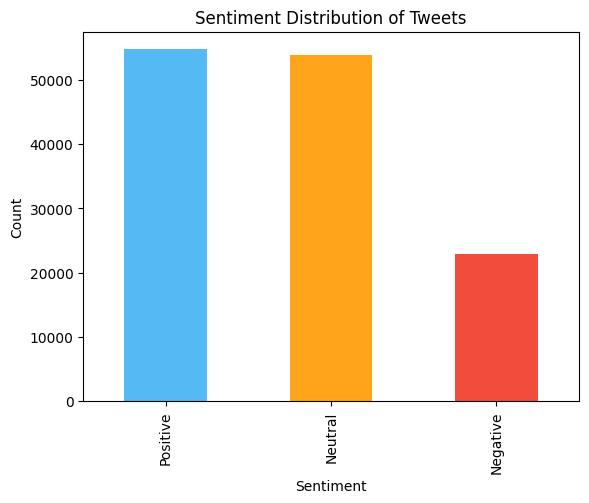

In [50]:
import matplotlib.pyplot as plt

# Calculate the count of each sentiment category
sentiment_counts = election_dataset['Sentiment'].value_counts()

# Plot the bar chart for sentiment distribution with colors
colors = ['#55B9F3', '#FFA41B', '#F24C3D']  # Blue, Yellow, and Red
sentiment_counts.plot(kind='bar', color=colors)

plt.title('Sentiment Distribution of Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


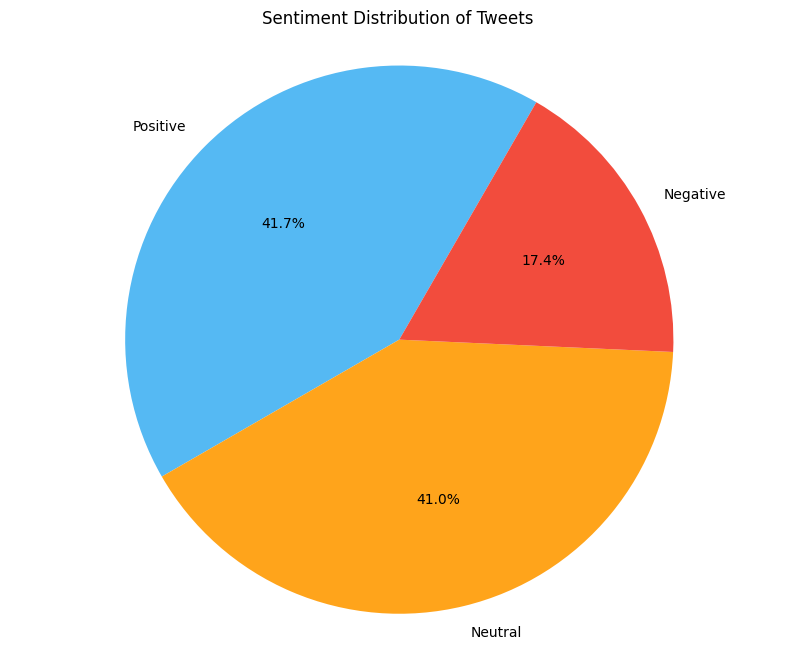

In [53]:
sentiment_counts = election_dataset['Sentiment'].value_counts()

# Plot the pie chart for sentiment distribution
plt.figure(figsize=(10, 8))
labels = sentiment_counts.index
sizes = sentiment_counts.values
colors = ['#55B9F3', '#FFA41B', '#F24C3D']  # Blue, Red, and Yellow
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=60)
plt.title('Sentiment Distribution of Tweets')
plt.axis('equal')
plt.show()


In [46]:
# import matplotlib.pyplot as plt

# # Calculate the count of each sentiment category
# sentiments = [atiku_sentiments, obi_sentiments, tinubu_sentiments]
# candidates = ['Atiku', 'Obi', 'Tinubu']

# # Plot the bar chart for sentiment distribution with colors
# colors = ['#55B9F3', '#FFA41B', '#F24C3D']  # Blue, Yellow, and Red
# sentiment_counts.plot(kind='bar', color=colors)

# plt.title('Number of Tweets for each Candidate')
# plt.xlabel('Candidate')
# plt.ylabel('Number of Tweets')
# plt.show()


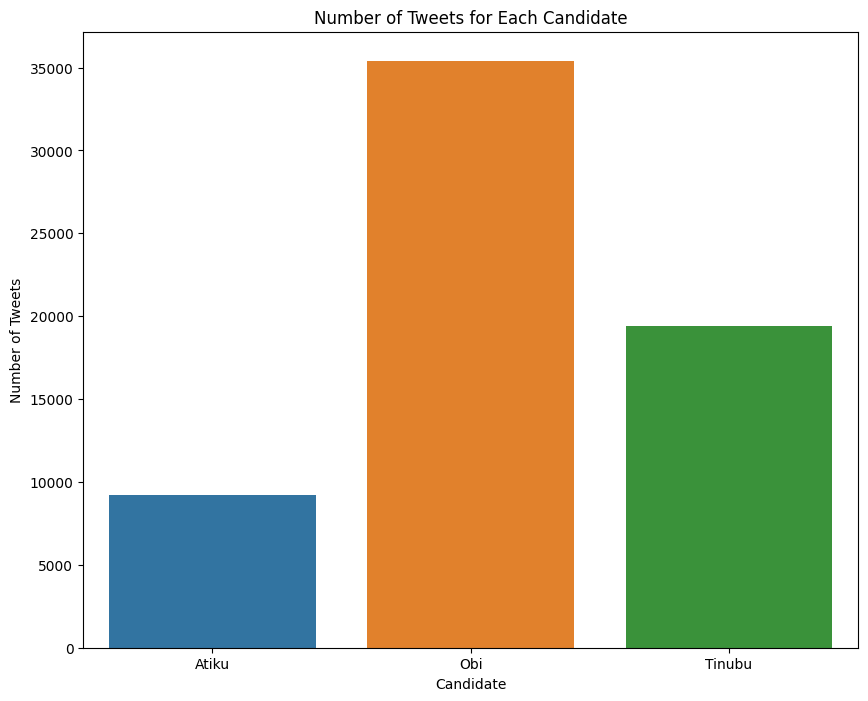

In [55]:
sentiments = [atiku_sentiments, obi_sentiments, tinubu_sentiments]
candidates = ['Atiku', 'Obi', 'Tinubu']

plt.figure(figsize=(10, 8))
sns.barplot(x=candidates, y=[len(sentiment) for sentiment in sentiments])
plt.xlabel('Candidate')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets for Each Candidate')
plt.show()

In [48]:
# import matplotlib.pyplot as plt

# # Calculate the count of each sentiment category
# sentiments = [atiku_sentiments, obi_sentiments, tinubu_sentiments]
# candidates = ['Atiku', 'Obi', 'Tinubu']

# # Plot the bar chart for sentiment distribution with colors
# colors = ['#55B9F3', '#FFA41B', '#F24C3D']  # Blue, Yellow, and Red
# sentiment_counts.plot(kind='bar', color=colors)

# # Customize the x-axis labels
# plt.xticks(range(len(candidates)), candidates)

# plt.title('Number of Tweets for each Candidate')
# plt.xlabel('Candidate')
# plt.ylabel('Number of Tweets')
# plt.show()


In [56]:
# Sentiment distribution for each presidential candidate
candidate_sentiment_counts = election_dataset.groupby('User')['Sentiment'].value_counts()


In [50]:
# # Calculate the count of each sentiment category for each candidate
# atiku_sentiment_counts = election_dataset[election_dataset['Candidate'] == 'Atiku']['Sentiment'].value_counts()
# obi_sentiment_counts = election_dataset[election_dataset['Candidate'] == 'Obi']['Sentiment'].value_counts()
# tinubu_sentiment_counts = election_dataset[election_dataset['Candidate'] == 'Tinubu']['Sentiment'].value_counts()

# # Create a dictionary to map candidate names to their respective sentiment counts
# sentiment_counts_dict = {
#     'Atiku': atiku_sentiment_counts,
#     'Obi': obi_sentiment_counts,
#     'Tinubu': tinubu_sentiment_counts
# }

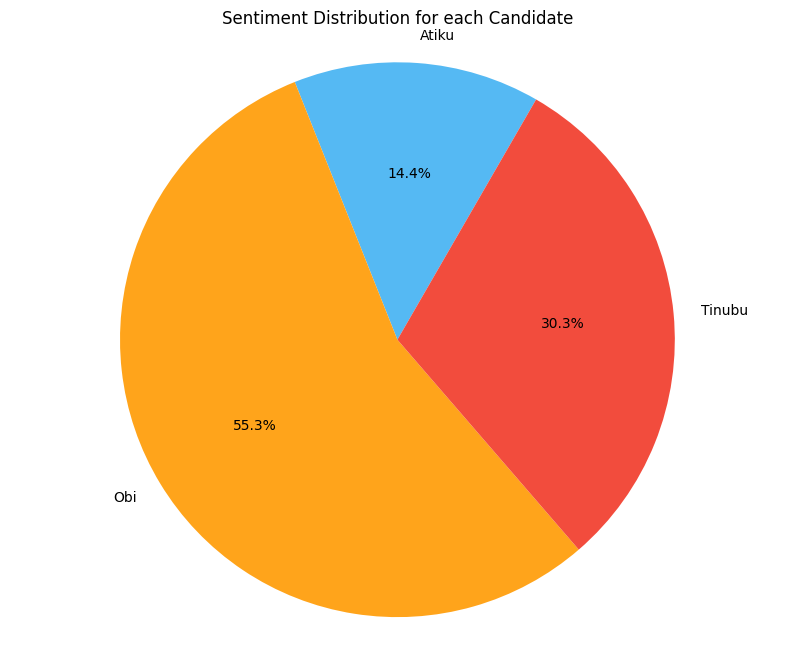

In [57]:
# Plot the pie chart for sentiment distribution
plt.figure(figsize=(10, 8))
labels = sentiment_counts.index
sizes = sentiment_counts.values
colors = ['#55B9F3', '#FFA41B', '#F24C3D']  # Blue, Red, and Yellow
plt.pie([len(sentiment) for sentiment in sentiments], labels=candidates, colors=colors, autopct='%1.1f%%', startangle=60)
plt.title('Sentiment Distribution for each Candidate')
plt.axis('equal')
plt.show()

In [58]:
atiku_negative = len([sentiment for sentiment in atiku_sentiments if sentiment < 0])
atiku_positive = len([sentiment for sentiment in atiku_sentiments if sentiment > 0])
atiku_neutral = len([sentiment for sentiment in atiku_sentiments if sentiment == 0])

obi_negative = len([sentiment for sentiment in obi_sentiments if sentiment < 0])
obi_positive = len([sentiment for sentiment in obi_sentiments if sentiment > 0])
obi_neutral = len([sentiment for sentiment in obi_sentiments if sentiment == 0])

tinubu_negative = len([sentiment for sentiment in tinubu_sentiments if sentiment < 0])
tinubu_positive = len([sentiment for sentiment in tinubu_sentiments if sentiment > 0])
tinubu_neutral = len([sentiment for sentiment in tinubu_sentiments if sentiment == 0])

In [59]:
labels = ['Negative', 'Positive', 'Neutral']
atiku_sentiment_counts = [atiku_negative, atiku_positive, atiku_neutral]
obi_sentiment_counts = [obi_negative, obi_positive, obi_neutral]
tinubu_sentiment_counts = [tinubu_negative, tinubu_positive, tinubu_neutral]

In [60]:
print(atiku_sentiment_counts)

[1889, 2833, 4471]


In [61]:
print(obi_sentiment_counts)

[3804, 15445, 16144]


In [62]:
print(tinubu_sentiment_counts)

[2304, 6105, 10997]


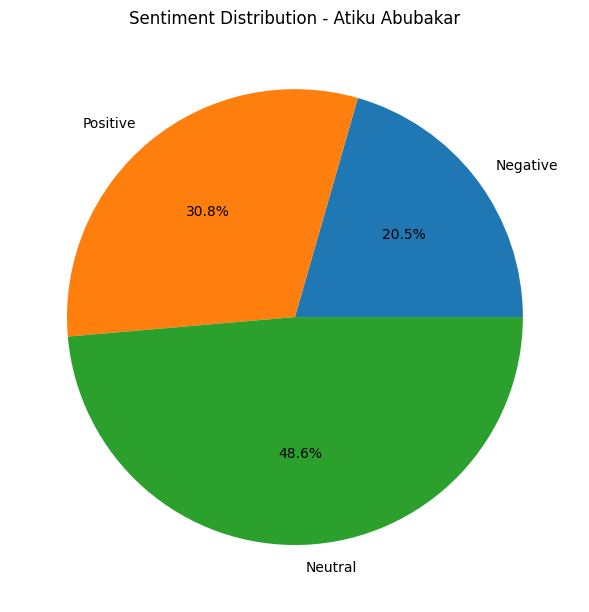

In [63]:
# Atiku Pie Chart

plt.figure(figsize=(25, 15))

plt.subplot(1, 3, 1)
plt.pie(atiku_sentiment_counts, labels=labels, autopct='%1.1f%%')
plt.title('Sentiment Distribution - Atiku Abubakar')
plt.show()

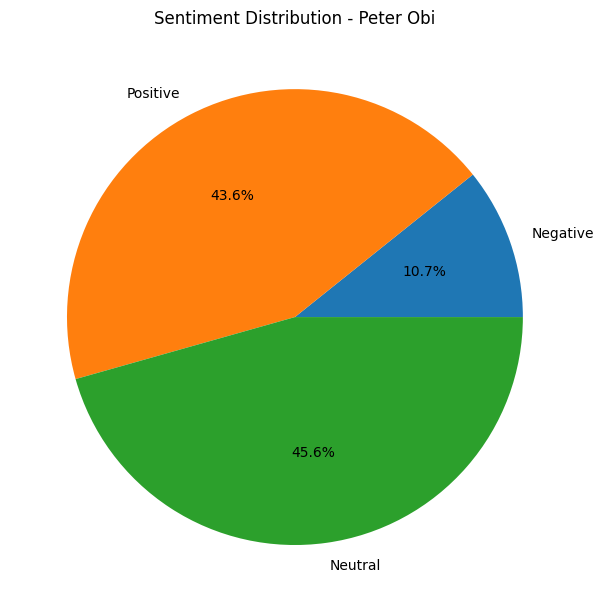

In [64]:
# Obi Pie Chart

plt.figure(figsize=(25, 15))

plt.subplot(1, 3, 1)
plt.pie(obi_sentiment_counts, labels=labels, autopct='%1.1f%%')
plt.title('Sentiment Distribution - Peter Obi')
plt.show()

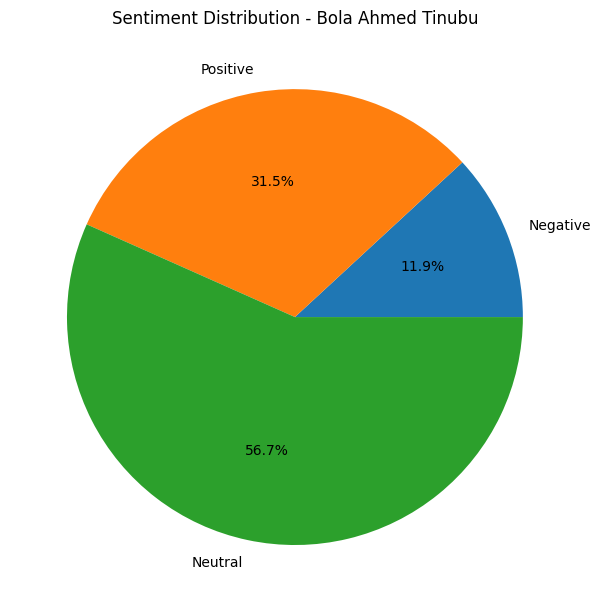

In [65]:
# Tinubu Pie Chart

plt.figure(figsize=(25, 15))

plt.subplot(1, 3, 1)
plt.pie(tinubu_sentiment_counts, labels=labels, autopct='%1.1f%%')
plt.title('Sentiment Distribution - Bola Ahmed Tinubu')
plt.show()

In [66]:
print('Total number of Negative Tweets regarding Atiku: ', atiku_negative)
print('Total number of Positive Tweets regarding Atiku: ', atiku_positive)
print('Total number of Neutral Tweets regarding Atiku: ', atiku_neutral)

Total number of Negative Tweets regarding Atiku:  1889
Total number of Positive Tweets regarding Atiku:  2833
Total number of Neutral Tweets regarding Atiku:  4471


In [67]:
print('Total number of Negative Tweets regarding Obi: ', obi_negative)
print('Total number of Positive Tweets regarding Obi: ', obi_positive)
print('Total number of Neutral Tweets regarding obi: ', obi_neutral)

Total number of Negative Tweets regarding Obi:  3804
Total number of Positive Tweets regarding Obi:  15445
Total number of Neutral Tweets regarding obi:  16144


In [68]:
print('Total number of Negative Tweets regarding Tinubu: ', tinubu_negative)
print('Total number of Positive Tweets regarding Tinubu: ', tinubu_positive)
print('Total number of Neutral Tweets regarding Tinubu: ', tinubu_neutral)

Total number of Negative Tweets regarding Tinubu:  2304
Total number of Positive Tweets regarding Tinubu:  6105
Total number of Neutral Tweets regarding Tinubu:  10997


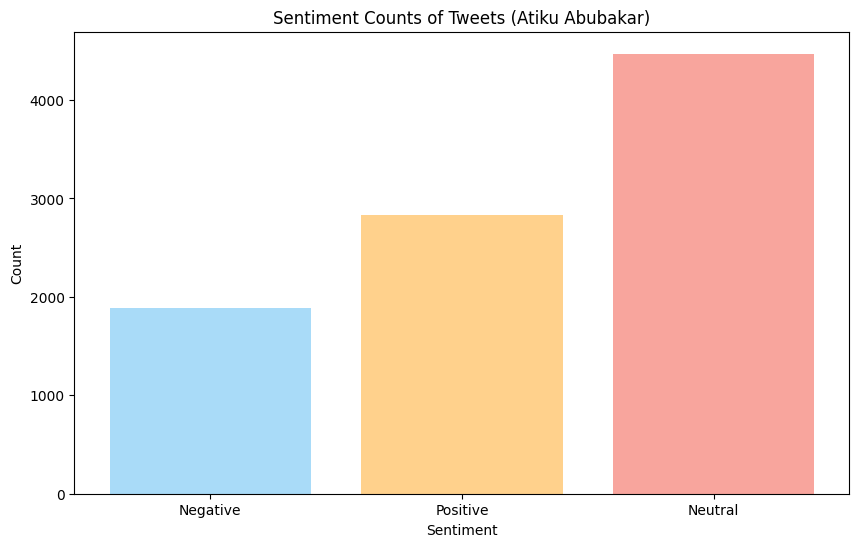

In [72]:
import matplotlib.pyplot as plt

x = ['Negative', 'Positive', 'Neutral']
atiku_counts = [atiku_negative, atiku_positive, atiku_neutral]

# Define custom colors for each sentiment
#colors = ['red', 'blue', 'cyan']
colors = ['#55B9F3', '#FFA41B', '#F24C3D']

plt.figure(figsize=(10, 6))
plt.bar(x, atiku_counts, alpha=0.5, color=colors)

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Counts of Tweets (Atiku Abubakar)')
plt.show()

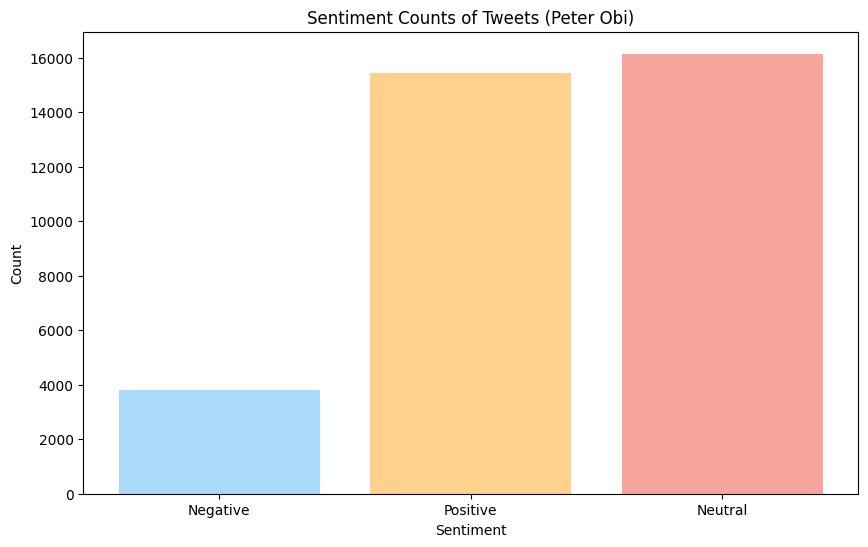

In [ ]:
import matplotlib.pyplot as plt

x = ['Negative', 'Positive', 'Neutral']
obi_counts = [obi_negative, obi_positive, obi_neutral]

# Define custom colors for each sentiment
#colors = ['red', 'blue', 'cyan']
colors = ['#55B9F3', '#FFA41B', '#F24C3D']

plt.figure(figsize=(10, 6))
plt.bar(x, obi_counts, alpha=0.5, color=colors)

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Counts of Tweets (Peter Obi)')
plt.show()

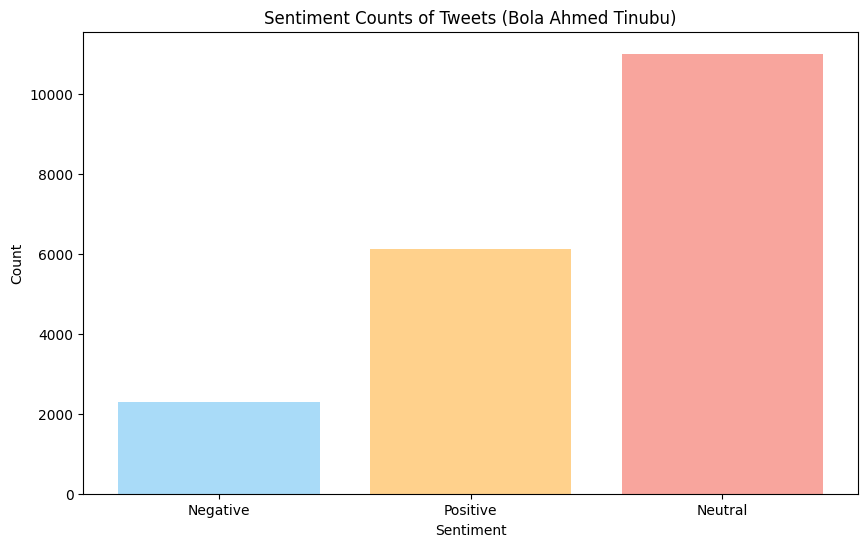

In [74]:
import matplotlib.pyplot as plt

x = ['Negative', 'Positive', 'Neutral']
tinubu_counts = [tinubu_negative, tinubu_positive, tinubu_neutral]

# Define custom colors for each sentiment
#colors = ['red', 'blue', 'cyan']
colors = ['#55B9F3', '#FFA41B', '#F24C3D']

plt.figure(figsize=(10, 6))
plt.bar(x, tinubu_counts, alpha=0.5, color=colors)

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Counts of Tweets (Bola Ahmed Tinubu)')
plt.show()

### Confusion Matrix

Confusion Matrix for SVC(kernel='linear'):
[[3298  857  446]
 [ 448 9579  645]
 [ 294  744 9989]]



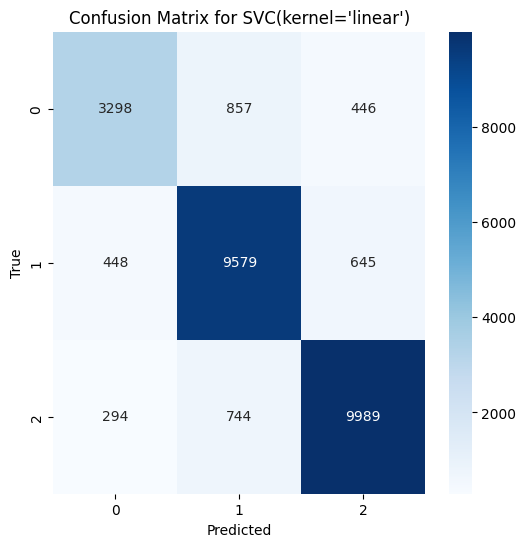

In [75]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, svm_predictions)
print(f"Confusion Matrix for {svm_model}:\n{cm}\n")

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix for {svm_model}')
plt.show()

Confusion Matrix for MultinomialNB():
[[2327 1146 1128]
 [ 410 7643 2619]
 [ 242 1113 9672]]



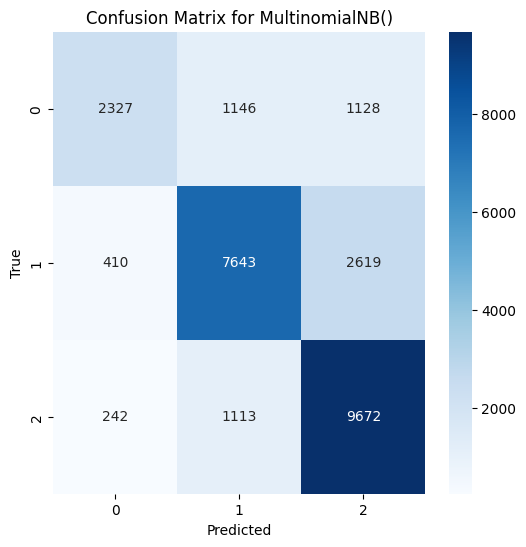

In [76]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, nb_predictions)
print(f"Confusion Matrix for {nb_model}:\n{cm}\n")

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix for {nb_model}')
plt.show()

Confusion Matrix for LogisticRegression():
[[3061 1066  474]
 [ 465 9473  734]
 [ 283  900 9844]]



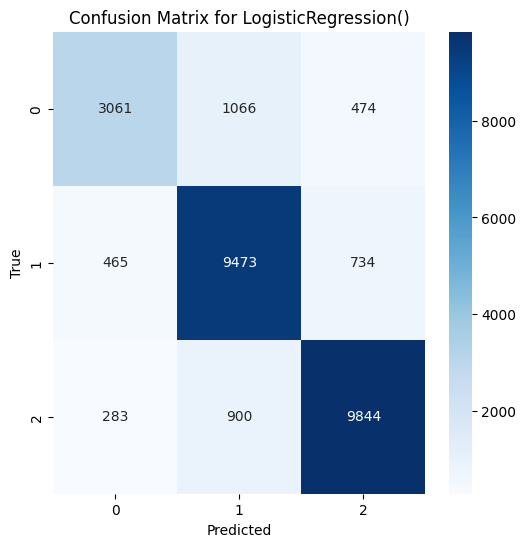

In [77]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, lr_predictions)
print(f"Confusion Matrix for {lr_model}:\n{cm}\n")

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix for {lr_model}')
plt.show()

Confusion Matrix for RandomForestClassifier():
[[2633 1261  707]
 [ 196 9686  790]
 [ 130 1339 9558]]



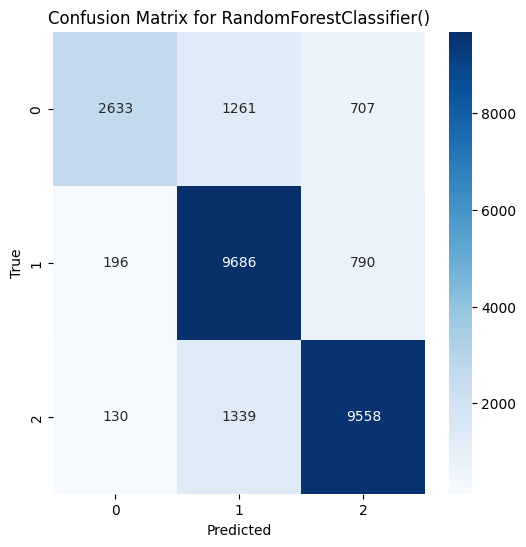

In [78]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, rf_predictions)
print(f"Confusion Matrix for {rf_model}:\n{cm}\n")

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix for {rf_model}')
plt.show()

### Word Cloud

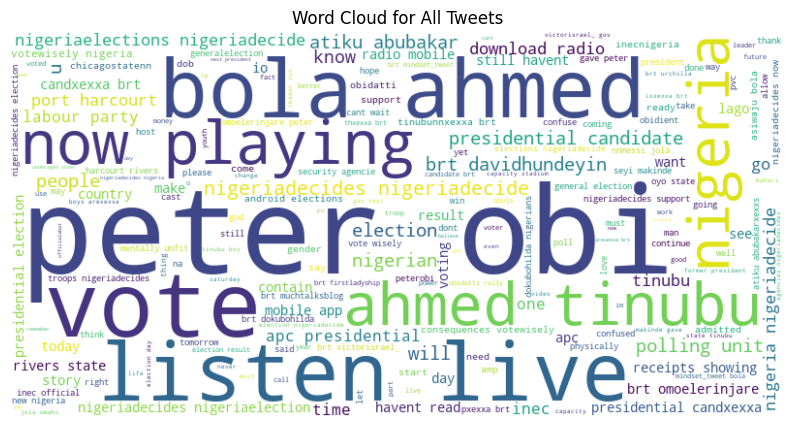

In [70]:
from wordcloud import WordCloud

# Create a Word Cloud for the entire dataset
all_tweets_text = " ".join(election_dataset['Tweet'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweets_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for All Tweets")
plt.show()

In [79]:
# Function to plot the top 20 frequency tweets for a candidate
def plot_top_20_tweets(candidate):
    top_tweets = election_dataset[election_dataset['User'] == candidate]['Tweet'].value_counts()[:20]
    plt.figure(figsize=(10, 6))
    plt.barh(top_tweets.index, top_tweets.values)
    plt.gca().invert_yaxis()
    plt.xlabel("Frequency")
    plt.ylabel("Tweet")
    plt.title(f"Top 20 Frequency Tweets for {candidate}")
    plt.show()


In [81]:
# election_dataset.head()

In [80]:
from nrclex import NRCLex
str_tweet = ','.join(election_dataset['clean_text'])
text_object = NRCLex(str_tweet)

In [82]:
my_data = text_object.raw_emotion_scores
my_data

{'disgust': 36630,
 'fear': 59160,
 'negative': 89138,
 'anger': 40352,
 'anticipation': 79004,
 'positive': 146992,
 'trust': 112244,
 'joy': 56366,
 'sadness': 38523,
 'surprise': 34916}

In [83]:
del(my_data['positive'])
del(my_data['negative'])
del(my_data['trust'])

In [84]:
my_data

{'disgust': 36630,
 'fear': 59160,
 'anger': 40352,
 'anticipation': 79004,
 'joy': 56366,
 'sadness': 38523,
 'surprise': 34916}

In [85]:
emotion_df = pd.DataFrame.from_dict(my_data, orient='index')
emotion_df = emotion_df.reset_index()
emotion_df = emotion_df.rename(columns={'index' : 'Emotion Classification' , 0: 'Emotion Count'})
emotion_df = emotion_df.sort_values(by=['Emotion Count'], ascending=False)
import plotly.express as px
fig = px.bar(emotion_df, x='Emotion Count', y='Emotion Classification', color = 'Emotion Classification', orientation='h', width = 800, height = 400)
fig.update_layout(width=1600, height=800)
fig.show()

In [86]:
emotion_df = pd.DataFrame.from_dict(my_data, orient='index')
emotion_df = emotion_df.reset_index()
emotion_df = emotion_df.rename(columns={'index' : 'Emotion Classification' , 0: 'Emotion Count'})
emotion_df = emotion_df.sort_values(by=['Emotion Count'], ascending=False)
import plotly.express as px
fig = px.bar(emotion_df, x='Emotion Count', y='Emotion Classification', color = 'Emotion Classification', orientation='h', width = 800, height = 400)
fig.update_layout(width=1200, height=400)
fig.show()

In [ ]:
# election_dataset.to_csv("final_test.csv", index=False)

In [78]:
atiku_tweet = election_dataset[election_dataset['clean_text'].str.contains('Atiku', case=False)]
obi_tweet = election_dataset[election_dataset['clean_text'].str.contains('Obi', case=False)]
tinubu_tweet = election_dataset[election_dataset['clean_text'].str.contains('Tinubu', case=False)]


In [90]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Assuming you have loaded NLTK's stopwords using nltk.download('stopwords')

# Preprocess text data (tokenization, lowercase, etc.) for each subset
def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Tokenization and lowercase
    filtered_tokens = [token for token in tokens if token.isalnum()]  # Remove non-alphanumeric tokens
    filtered_tokens = [token for token in filtered_tokens if token not in stopwords.words('english')]  # Remove stopwords
    preprocessed_text = " ".join(filtered_tokens)
    return preprocessed_text

atiku_tweet['preprocessed_text'] = atiku_tweet['clean_text'].apply(preprocess_text)
obi_tweet['preprocessed_text'] = obi_tweet['clean_text'].apply(preprocess_text)
tinubu_tweet['preprocessed_text'] = tinubu_tweet['clean_text'].apply(preprocess_text)


C:\Users\USER\AppData\Local\Temp\ipykernel_25252\2990776241.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\USER\AppData\Local\Temp\ipykernel_25252\2990776241.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\USER\AppData\Local\Temp\ipykernel_25252\2990776241.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [91]:
# Apply feature extraction (TF-IDF) for each subset
atiku_features = tfidf_vectorizer.transform(atiku_tweet['clean_text'])
obi_features = tfidf_vectorizer.transform(obi_tweet['clean_text'])
tinubu_features = tfidf_vectorizer.transform(tinubu_tweet['clean_text'])

### Atiku Abubakar

In [92]:
# Predict sentiment using respective models for each candidate
atiku_predictions = svm_model.predict(atiku_features)

In [93]:
# Predict sentiment using respective models for each candidate
atiku_predictions1 = nb_model.predict(atiku_features)

In [94]:
# Predict sentiment using respective models for each candidate
atiku_predictions2 = lr_model.predict(atiku_features)

In [95]:
# Predict sentiment using respective models for each candidate
atiku_predictions3 = rf_model.predict(atiku_features)

In [96]:
# Print classification report for Atiku (SVM)
print("Classification Report for Atiku:")
print(classification_report(atiku_tweet['Sentiment'], atiku_predictions))

Classification Report for Atiku:
              precision    recall  f1-score   support

    Negative       0.89      0.79      0.84      1996
     Neutral       0.86      0.90      0.88      3358
    Positive       0.91      0.93      0.92      3839

    accuracy                           0.89      9193
   macro avg       0.89      0.87      0.88      9193
weighted avg       0.89      0.89      0.89      9193



In [97]:
# Print classification report for Atiku (NB)
print("Classification Report for Atiku:")
print(classification_report(atiku_tweet['Sentiment'], atiku_predictions1))

Classification Report for Atiku:
              precision    recall  f1-score   support

    Negative       0.91      0.67      0.77      1996
     Neutral       0.79      0.72      0.75      3358
    Positive       0.75      0.91      0.82      3839

    accuracy                           0.79      9193
   macro avg       0.81      0.77      0.78      9193
weighted avg       0.80      0.79      0.78      9193



In [98]:
# Print classification report for Atiku (LR)
print("Classification Report for Atiku:")
print(classification_report(atiku_tweet['Sentiment'], atiku_predictions2))

Classification Report for Atiku:


              precision    recall  f1-score   support

    Negative       0.89      0.78      0.83      1996
     Neutral       0.85      0.89      0.87      3358
    Positive       0.90      0.93      0.91      3839

    accuracy                           0.88      9193
   macro avg       0.88      0.86      0.87      9193
weighted avg       0.88      0.88      0.88      9193



In [99]:
# Print classification report for Atiku (RF)
print("Classification Report for Atiku:")
print(classification_report(atiku_tweet['Sentiment'], atiku_predictions3))

Classification Report for Atiku:
              precision    recall  f1-score   support

    Negative       0.98      0.91      0.94      1996
     Neutral       0.93      0.96      0.94      3358
    Positive       0.96      0.97      0.96      3839

    accuracy                           0.95      9193
   macro avg       0.95      0.94      0.95      9193
weighted avg       0.95      0.95      0.95      9193



In [100]:
# Print sentiment distribution for Atiku (SVM)
print("Sentiment Distribution for Atiku:")
print(pd.Series(atiku_predictions).value_counts())

Sentiment Distribution for Atiku:
Positive    3900
Neutral     3507
Negative    1786
dtype: int64


In [111]:
# Print sentiment distribution for Atiku (Naive Bayes)
print("Sentiment Distribution for Atiku:")
print(pd.Series(atiku_predictions1).value_counts())

Sentiment Distribution for Atiku:
Positive    4655
Neutral     3060
Negative    1478
dtype: int64


In [112]:
# Print sentiment distribution for Atiku (Logistic Regression)
print("Sentiment Distribution for Atiku:")
print(pd.Series(atiku_predictions2).value_counts())

Sentiment Distribution for Atiku:
Positive    3945
Neutral     3494
Negative    1754
dtype: int64


In [113]:
# Print sentiment distribution for Atiku (Random Forest)
print("Sentiment Distribution for Atiku:")
print(pd.Series(atiku_predictions3).value_counts())

Sentiment Distribution for Atiku:
Positive    3863
Neutral     3474
Negative    1856
dtype: int64


### Peter Obi

In [101]:
# Predict sentiment using respective models for each candidate
obi_predictions = svm_model.predict(obi_features)

In [102]:
# Predict sentiment using respective models for each candidate
obi_predictions1 = nb_model.predict(obi_features)

In [103]:
# Predict sentiment using respective models for each candidate
obi_predictions2 = lr_model.predict(obi_features)

In [104]:
# Predict sentiment using respective models for each candidate
obi_predictions3 = rf_model.predict(obi_features)

In [105]:
# Print classification report for Obi (SVM)
print("Classification Report for Obi:")
print(classification_report(obi_tweet['Sentiment'], obi_predictions))

Classification Report for Obi:
              precision    recall  f1-score   support

    Negative       0.70      0.73      0.71      5133
     Neutral       0.87      0.85      0.86     14272
    Positive       0.88      0.89      0.88     15988

    accuracy                           0.85     35393
   macro avg       0.82      0.82      0.82     35393
weighted avg       0.85      0.85      0.85     35393



In [108]:
# Print classification report for Obi (NB)
print("Classification Report for Obi:")
print(classification_report(obi_tweet['Sentiment'], obi_predictions1))

Classification Report for Obi:
              precision    recall  f1-score   support

    Negative       0.82      0.51      0.63      5133
     Neutral       0.81      0.73      0.77     14272
    Positive       0.75      0.91      0.82     15988

    accuracy                           0.78     35393
   macro avg       0.79      0.71      0.74     35393
weighted avg       0.78      0.78      0.77     35393



In [109]:
# Print classification report for Obi (LR)
print("Classification Report for Obi:")
print(classification_report(obi_tweet['Sentiment'], obi_predictions2))

Classification Report for Obi:
              precision    recall  f1-score   support

    Negative       0.82      0.68      0.74      5133
     Neutral       0.87      0.88      0.88     14272
    Positive       0.89      0.93      0.91     15988

    accuracy                           0.87     35393
   macro avg       0.86      0.83      0.84     35393
weighted avg       0.87      0.87      0.87     35393



In [110]:
# Print classification report for Obi (RF)
print("Classification Report for Obi:")
print(classification_report(obi_tweet['Sentiment'], obi_predictions3))

Classification Report for Obi:
              precision    recall  f1-score   support

    Negative       0.97      0.84      0.90      5133
     Neutral       0.92      0.95      0.94     14272
    Positive       0.94      0.95      0.95     15988

    accuracy                           0.94     35393
   macro avg       0.94      0.92      0.93     35393
weighted avg       0.94      0.94      0.94     35393



In [114]:
# Print sentiment distribution for Obi (SVM)
print("Sentiment Distribution for Obi:")
print(pd.Series(obi_predictions).value_counts())

Sentiment Distribution for Obi:
Positive    16124
Neutral     13914
Negative     5355
dtype: int64


In [115]:
# Print sentiment distribution for Obi (Naive Bayes)
print("Sentiment Distribution for Obi:")
print(pd.Series(obi_predictions1).value_counts())

Sentiment Distribution for Obi:
Positive    19446
Neutral     12796
Negative     3151
dtype: int64


In [116]:
# Print sentiment distribution for Obi (Logistic Regression)
print("Sentiment Distribution for Obi:")
print(pd.Series(obi_predictions2).value_counts())

Sentiment Distribution for Obi:
Positive    16686
Neutral     14420
Negative     4287
dtype: int64


In [117]:
# Print sentiment distribution for Obi (Random Forest)
print("Sentiment Distribution for Obi:")
print(pd.Series(obi_predictions3).value_counts())

Sentiment Distribution for Obi:
Positive    16202
Neutral     14725
Negative     4466
dtype: int64


### Bola Ahmed Tinubu

In [118]:
# Predict sentiment using respective models for each candidate
tinubu_predictions = svm_model.predict(tinubu_features)

In [119]:
# Predict sentiment using respective models for each candidate
tinubu_predictions1 = nb_model.predict(tinubu_features)

In [120]:
# Predict sentiment using respective models for each candidate
tinubu_predictions2 = lr_model.predict(tinubu_features)

In [121]:
# Predict sentiment using respective models for each candidate
tinubu_predictions3 = rf_model.predict(tinubu_features)

In [122]:
# Print classification report for Tinubu (SVM)
print("Classification Report for Tinubu:")
print(classification_report(tinubu_tweet['Sentiment'], tinubu_predictions))

Classification Report for Tinubu:
              precision    recall  f1-score   support

    Negative       0.71      0.71      0.71      2428
     Neutral       0.91      0.91      0.91     11119
    Positive       0.89      0.88      0.88      5859

    accuracy                           0.88     19406
   macro avg       0.83      0.83      0.83     19406
weighted avg       0.88      0.88      0.88     19406



In [123]:
# Print classification report for Tinubu (NB)
print("Classification Report for Tinubu:")
print(classification_report(tinubu_tweet['Sentiment'], tinubu_predictions1))

Classification Report for Tinubu:
              precision    recall  f1-score   support

    Negative       0.77      0.45      0.57      2428
     Neutral       0.83      0.88      0.86     11119
    Positive       0.75      0.80      0.77      5859

    accuracy                           0.80     19406
   macro avg       0.79      0.71      0.73     19406
weighted avg       0.80      0.80      0.79     19406



In [124]:
# Print classification report for Tinubu (LR)
print("Classification Report for Tinubu:")
print(classification_report(tinubu_tweet['Sentiment'], tinubu_predictions2))

Classification Report for Tinubu:
              precision    recall  f1-score   support

    Negative       0.80      0.66      0.72      2428
     Neutral       0.90      0.94      0.92     11119
    Positive       0.89      0.88      0.88      5859

    accuracy                           0.88     19406
   macro avg       0.86      0.82      0.84     19406
weighted avg       0.88      0.88      0.88     19406



In [125]:
# Print classification report for Tinubu (RF)
print("Classification Report for Tinubu:")
print(classification_report(tinubu_tweet['Sentiment'], tinubu_predictions3))

Classification Report for Tinubu:
              precision    recall  f1-score   support

    Negative       0.98      0.84      0.90      2428
     Neutral       0.95      0.98      0.97     11119
    Positive       0.95      0.95      0.95      5859

    accuracy                           0.95     19406
   macro avg       0.96      0.92      0.94     19406
weighted avg       0.95      0.95      0.95     19406



In [126]:
# Print sentiment distribution for Tinubu (SVM)
print("Sentiment Distribution for Tinubu:")
print(pd.Series(tinubu_predictions).value_counts())

Sentiment Distribution for Tinubu:
Neutral     11147
Positive     5813
Negative     2446
dtype: int64


In [127]:
# Print sentiment distribution for Tinubu (Naive Bayes)
print("Sentiment Distribution for Tinubu:")
print(pd.Series(tinubu_predictions1).value_counts())

Sentiment Distribution for Tinubu:
Neutral     11772
Positive     6236
Negative     1398
dtype: int64


In [128]:
# Print sentiment distribution for Tinubu (Logistic Regression)
print("Sentiment Distribution for Tinubu:")
print(pd.Series(tinubu_predictions2).value_counts())

Sentiment Distribution for Tinubu:
Neutral     11608
Positive     5803
Negative     1995
dtype: int64


In [129]:
# Print sentiment distribution for Tinubu (Random Forest)
print("Sentiment Distribution for Tinubu:")
print(pd.Series(tinubu_predictions3).value_counts())

Sentiment Distribution for Tinubu:
Neutral     11490
Positive     5833
Negative     2083
dtype: int64


In [130]:
# Find the location that tweeted the most
most_common_location = election_dataset['User_Location'].value_counts().idxmax()
print("Location that tweeted the most about the Elections:", most_common_location)

Location that tweeted the most about the Elections: Nigeria


In [133]:
from sklearn.model_selection import learning_curve

# Example SVM model (replace with your own model)
svm_model = SVC(kernel='linear')

# Calculate learning curve
train_sizes, train_scores, test_scores = learning_curve(
    svm_model, X_train_tfidf, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 5))

In [ ]:
# # Function to generate NRC lexicons for a given text
# def generate_nrc_lexicons(text):
#     lexicons = nltk.sentiment.util.demo_liu_hu_lexicon(text)
#     return lexicons

# # Apply the function to the 'Tweet' column in the dataset
# election_dataset['NRC_Lexicons'] = election_dataset['Tweet'].apply(generate_nrc_lexicons)

#(y_test, nb_predictions)

In [ ]:
# # Extract emotion counts from the NRC Lexicons
# emotion_counts = election_dataset['NRC_Lexicons'].apply(pd.Series).stack().value_counts()

# # Visualize the NRC Lexicons
# plt.figure(figsize=(10, 6))
# plt.bar(emotion_counts.index, emotion_counts.values)
# plt.xticks(rotation=45, ha='right')
# plt.title("NRC Lexicons Emotion Counts")
# plt.show()
